# Continuous Distributions

**Continuous distributions** are probability distributions that deal with continuous values (e.g. decimals, floating point values) rather than discrete values (binary, integer, natural number values). The most famous is the normal distribution, which is commonly found in nature and statistics. We will also use the exponential distribution and beta distribution to discover two more useful utilities. 

## Normal Distribution

The **normal distribution** is a symmetrical, bell-shaped curve that appears in many natural and scientific phenomena. Even for data that does not follow the normal distribution, it still generalizes to a normal distribution due to the central limit theorem which we will also briefly talk about. 

Let's say we expect a laptop to have 12 hours of battery life with a standard deviation of 1 hour. The standard deviation defines how "spread out" the bell curve is. The smaller the standard deviation the more consistent we expect the battery life to be. 

Below we use matplotlib to plot the normal distribution's **probability density function (PDF)** which is the bell shaped curve showing how likely we expect each value (in hours).

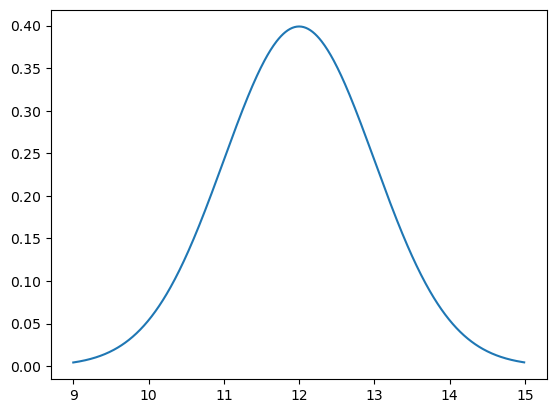

In [6]:
from scipy.stats import norm
import numpy as np 
import matplotlib.pyplot as plt

# define mean and standard deviation
mean = 12
std = 1

# have axis range capture ± 3 standard deviations around mean 
x_range = np.arange(mean-std*3, mean+std*3, .01) 

# plot the normal PDF 
plt.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 
plt.show()

The probability density function (PDF) formula for a normal distribution is defined as...

$ \Large f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $ 

where $ \mu $ is the mean, $ \sigma $ is the standard deviation, $ x $ is the input variable, and $ f(x) $ is the outputted likelihood. 

**There are a couple of important properties surrounding the normal distribution.**

* It is symmetrical down the center. 
* The top of the bell curve, the highest likelihood is at the mean.
* How "spread out" the the tails are is defined by standard deviation.
* The tails forever approach the x-axis but never reach it. 
* The area under the whole curve, like any probability distribution, is 1.0.

Looking up a specific likelihood *y*-value for a given *x*-value is not productive. Instead, we use ranges of *x* and capture areas for that range, which gives us a probability. For example, **what is the probability of getting between 10 and 14 hours of battery for a given charge**? We calculate the area/probability for that range as depicted below. 

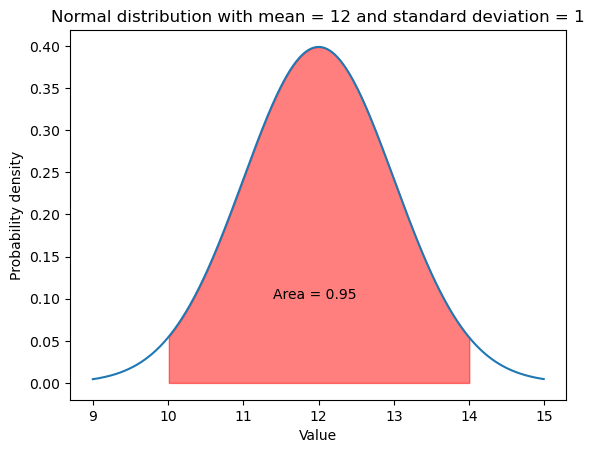

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# define mean and standard deviation
mean = 12
std = 1

# lower and upper bounds of area 
lower_x, upper_x = -3*std+mean, 3*std+mean 
lower_area_x, upper_area_x = 10, 14 

# have axis range capture ± 3 standard deviations around mean 
x = np.arange(lower_x, upper_x, .01) 
y = norm.pdf(x, mean, std)

# plot the normal PDF 
plt.plot(x, y) # bell curve 

# Calculate the shaded area under the curve 
shaded_area = norm.cdf(upper_area_x, mean, std) - norm.cdf(lower_area_x, mean, std)

# Plot the normal distribution and the shaded area
x_area_range = (x >= lower_area_x) & (x <= upper_area_x)
plt.fill_between(x[x_area_range], y[x_area_range], 0, alpha=0.5, color='red')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.title('Normal distribution with mean = {} and standard deviation = {}'.format(mean, std))
plt.text(11.4, 0.1, 'Area = {:.2f}'.format(shaded_area))
plt.show()

The area is $ .95 $ for that range, so theres a 95% probability a battery charge will last between 10 and 14 hours. Putting the matplotlib code aside, we can calculate this using the **cumulative density function (CDF)** which captures the area from negative infinity up to a given x-value. We can calculate the area up to 14, and then subtract the area up to 10. 

In [11]:
from scipy.stats import norm

mean, std = 12, 1

# Calculate the shaded area under the curve 
shaded_area = norm.cdf(14, mean, std) - norm.cdf(10, mean, std)

print(shaded_area) # 0.9544997361036416

0.9544997361036416


If you want to see what the cumulative density function looks like, you can plot it using matplotlib. Note it is an S-shaped curve that reaches $ .5 $ at the mean, and levels off near $ 1.0 $ as you go further down the right tail of the PDF. 

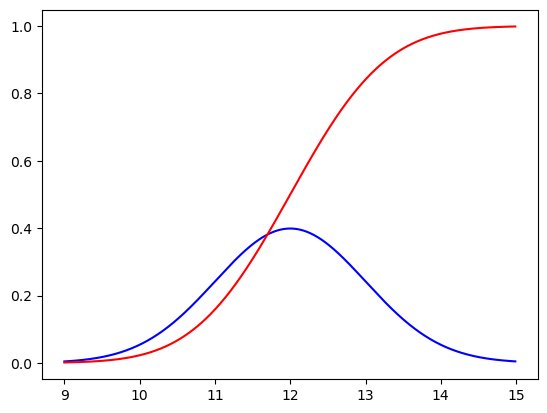

In [13]:
# plot PDF and CDF side-by-side 
plt.plot(x, norm.pdf(x, mean, std), color="blue") # probability density function 
plt.plot(x, norm.cdf(x, mean, std), color="red") # cumulative density function 
plt.show()

There is a lot of interesting applications to the normal distribution from a statistics perspective, from the central limit theorem to hypothesis testing which is covered in [another Anaconda course](https://learning.anaconda.cloud/statistics-and-hypothesis-testing). But let's keep the focus on probability. We can inverse the cumulative density function to create the **percent point function (PPF)**, which allows us to look up an x-value that captures a given area (from the left tail to that x-value). 

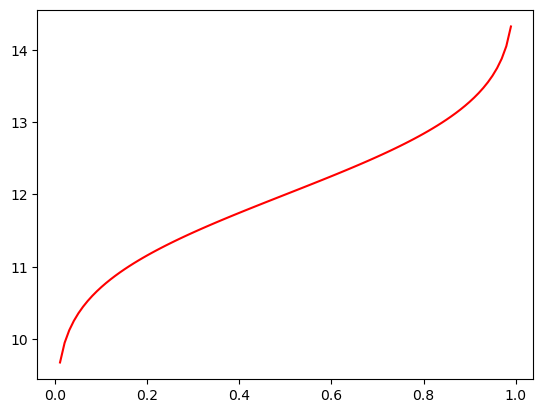

In [15]:
p = np.arange(0, 1, .01) 
plt.plot(p, norm.ppf(p, mean, std), color="red") # percent point function 
plt.show()

For example, what x-value gives me 80% of the area to the left of it? That can be answered using the PPF. 

In [17]:
norm.ppf(.8, mean, std) # 12.841621233572914

12.841621233572914

To tie this back, we now know $  12.841621233572914 $ gives us $ .8 $ of the area to the left. So we expect 80% of battery charges to last $ 12.84 $ hours or less. 

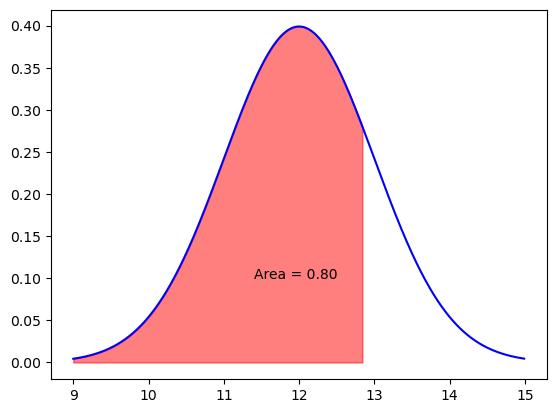

In [19]:
x_area_range = (x <= 12.841621233572914)
plt.plot(x, norm.pdf(x, mean, std), color="blue") # probability density function 
plt.fill_between(x[x_area_range], y[x_area_range], 0, alpha=0.5, color='red')
plt.text(11.4, 0.1, 'Area = {:.2f}'.format(.8))
plt.show()

## Exponential Distribution

Another useful continuous distribution is the **exponential distribution**, which is often used to model how much time occurs between events given an average duration. The formula for the probability density function of an exponential distribution is...

$ \Large f(x) = \lambda e^{-\lambda x} $ 

where $ \lambda $ is the average number of events to occur in a defined period. Let's say we release a YouTube video and we expect it will there will be on average 2 views every minute. How much time can we expect to occur between each view? This is what the exponential distribution helps us answer. 

Let's plot using SciPy as shown below. Note we have to input the lambda rate through the `scale` argument as $ \frac{1}{\lambda} $. 

In [22]:
from scipy.stats import expon 

x = np.arange(.01, 3, .01)
y = expon.pdf(x, scale = 1/lambda_rate)

lambda_rate = 2 # mean views per minute 

plt.plot(x, y)
plt.show()

NameError: name 'lambda_rate' is not defined

Now let's ask what is the probability after a given view, the next view will happen after 1 to 2 minutes? We want to find the area as shaded below. 

In [ ]:
lower_area_x, upper_area_x = 1, 2
x_area_range = (x >= lower_area_x) & (x <= upper_area_x)

plt.plot(x, expon.pdf(x, scale = 1/lambda_rate))
plt.fill_between(x[x_area_range], y[x_area_range], 0, alpha=0.5, color='red')
plt.show()

Just like we did with the normal distribution, we can use the cumulative density function (CDF) to calculate the area all the way up to 2, and then subtract all the area up to 1. This would return an area/probability of `.117`. 

In [ ]:
expon.cdf(2, scale = 1/lambda_rate) - expon.cdf(1, scale = 1/lambda_rate)

So there is an 11.7% probability the next view will occur after 1 to 2 minutes. 

## Beta Distribution

Here is one more continuous distribution that is useful. The **beta distribution** measures the probabilities of probabilities. If that sounds too meta, do not worry. Let's return to a problem we visited in the last section. 

Recall in the last section we used the binomial distribution to measure out of *n* trials, what is the probability for seeing *k* successes/events given *p* probability? We wanted to know how likely it would be with a 90% success rate, that we would see 8 working swimming mp3 players out of 10. Refer to the chart below to trigger your memory. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Set the number of trials and probability of success
n = 10
p = 0.9

# Generate x-values for the plot
x = np.arange(0, n + 1)

# Calculate the probability mass function (PMF)
pmf = binom.pmf(x, n, p)

# Plot the PMF
plt.bar(x, pmf, align='center')

# Set the title and labels
plt.title('Binomial Distribution')
plt.xlabel('Number of successes')
plt.ylabel('Probability')

# Show the plot
plt.show()

But what if we flipped the question? Rather than ask *how probable is 8/10 successes given an underlying 90% success rate*, let's instead ask *how likely is each probability of success (from 0.0 to 1.0) given 8/10 successes?* This is exactly what the beta distribution does. 

Let's plot the beta distribution below with 8 successes and 2 failures as our alpha/beta parameters. 

In [ ]:
from scipy.stats import beta 

a, b = 8, 2 # successes, failures 

x = np.arange(0, 1.01, .01)
y = beta.pdf(x, a, b)

plt.plot(x, y)
plt.show()

Notice how the x-axis reflects underlying probabilites of success between $ 0.0 $ and $ 1.0 $. The y-axis reflects how likely that probability of success is, given we have had 8/10 successes. Like all continuous distributions, we calculate probabilies using areas under the curve. 

For example given 8/10 succcesses, what is the probability the underlying rate of success is between $ .6 $ and $ .9 $? Let's first visualize this area of interest below. 

In [ ]:
lower_area_x, upper_area_x = .6, .9
x_area_range = (x >= lower_area_x) & (x <= upper_area_x)

plt.plot(x, beta.pdf(x, a, b))
plt.fill_between(x[x_area_range], y[x_area_range], 0, alpha=.5,  color='red')
plt.show()

We can then answer this, once again, with the cumulative density function, capturing the area all the way up to $ .9 $ and then subtracting the area up to $ .6 $. 

In [ ]:
beta.cdf(.9, a, b) - beta.cdf(.6, a, b)

That gives us an area of $ .704 $, so a 70.4% probability the underlying rate of working mp3 players is between $ .6 $ and $ .8 $. 

## Exercise 

img

You are trying to build a normal distribution of how many grams of beans makes an optimal 16 oz cup of coffee. After surveying hundreds baristas, you have determined the mean to be 33 grams with 1.5 gram standard deviation.

What is the probability the "optimal" cup of 16 coffee is between 31 and 35 grams? Complete the code below to find the answer. 

In [ ]:
from scipy.stats import norm

mean, std = 33, 1.5

p = norm.cdf(?,?,?) - ? 

print(p)

### SCROLL DOWN FOR ANSWER
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

The probability of the optimal number of grams for a 16 oz cup of coffee being between 31 and 35 is $ .8175 $. You can calculate this by using the normal distribution's cumulative density function (CDF). Calculate the area up to 35, and then subtract the area up to 31. 

In [ ]:
from scipy.stats import norm

mean, std = 33, 1.5

p = norm.cdf(35,mean,std) - norm.cdf(31,mean,std)

print(p)